In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from celluloid import Camera
from pygmo import hypervolume
import numpy as np

In [13]:
data = pd.read_csv('../log/first_experiment.csv', names = ['inutility', 'disclosure_averseness', 'seed', 'generation', 'timing'])

In [14]:
data['dataset'] = None

In [16]:
datas = ['strength', 'boston', 'airfoil', 'bioav']
for i in range(4):
    data.loc[i*(51*5):(i+1)*(51*5), 'dataset'] = datas[i-1]

In [17]:
data

,inutility,disclosure_averseness,seed,generation,timing,dataset
0,"[0.02981491028849692, 0.13168497641393595, 0.0...","[0.3557213930348259, 0.3527363184079602, 0.498...",0,0,21.336940,bioav
1,"[0.0054080269318586005, 0.007139650109421414]","[0.3666666666666667, 0.3288557213930348]",0,1,16.660803,bioav
2,"[0.0054080269318586005, 0.007139650109421414, ...","[0.3666666666666667, 0.3288557213930348, 0.328...",0,2,16.220135,bioav
3,"[0.0054080269318586005, 0.007139650109421414, ...","[0.3666666666666667, 0.3288557213930348, 0.328...",0,3,16.583133,bioav
4,"[0.0054080269318586005, 0.10964102331804604, 0...","[0.3666666666666667, 0.32885572139303476, 0.36...",0,4,16.720485,bioav
...,...,...,...,...,...,...
1015,[0.002599701776704766],[0.01536312849162011],4,46,84.982974,airfoil
1016,"[0.009785997883940523, 0.0002513214744871428]","[0.01536312849162011, 0.4259776536312849]",4,47,89.831214,airfoil
1017,"[0.04032645670987833, 0.00681920033811978, 0.0...","[0.01536312849162011, 0.018156424581005585, 0....",4,48,83.561092,airfoil
1018,"[0.012749276670970255, 0.0003666173843173137, ...","[0.01536312849162011, 0.4259776536312849, 0.01...",4,49,88.868324,airfoil


In [38]:
def calculate_hypervolume(row):
    front = list(zip(eval(row['inutility']), eval(row['disclosure_averseness'])))
    hv = hypervolume(front)
    ref_point = [2, 0.5]
    return hv.compute(ref_point)
    

In [72]:
def get_percentiles(row):
    x = eval(row['inutility'])
    idxs = []
    for p in [25, 50, 75]:
        pcen=np.percentile(x,p,interpolation='nearest')
        idxs.append(abs(x-pcen).argmin())
    return eval(row['inutility'])[idxs[0]], eval(row['inutility'])[idxs[1]], eval(row['inutility'])[idxs[2]], \
            eval(row['disclosure_averseness'])[idxs[0]], eval(row['disclosure_averseness'])[idxs[1]], eval(row['disclosure_averseness'])[idxs[2]]

In [75]:
data['percentiles'] = data.apply(get_percentiles, axis = 1)

In [85]:
data[['inutlity_25', 'inutlity_50', 'inutlity_75', 'disclosure_averseness_25',
      'disclosure_averseness_50','disclosure_averseness_75']]                   = data['percentiles'].tolist()

In [40]:
data['hypervolume_indicator'] = data.apply(calculate_hypervolume, axis = 1)

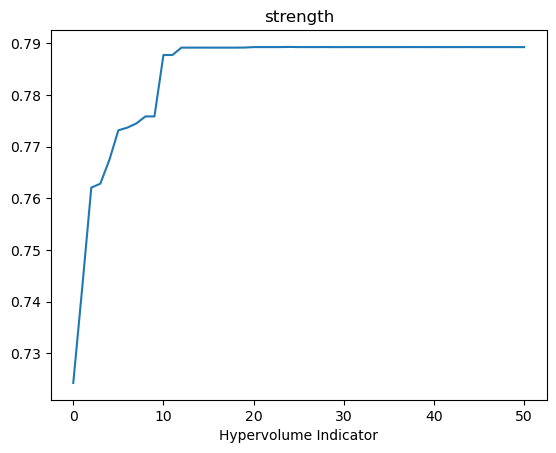

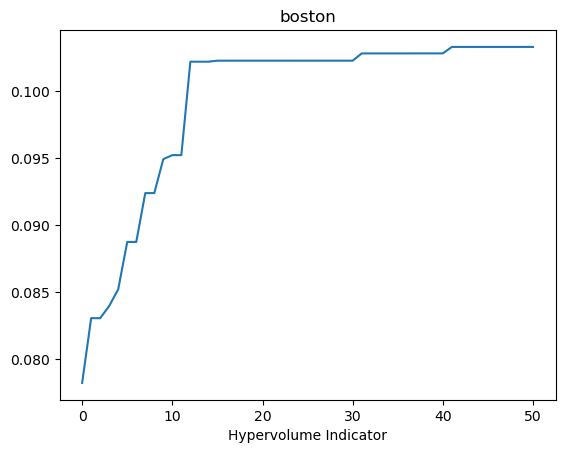

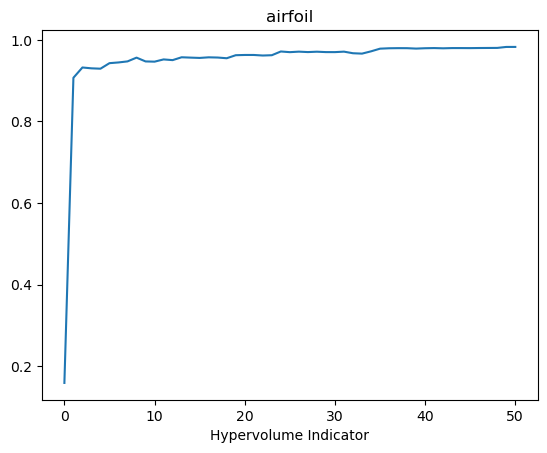

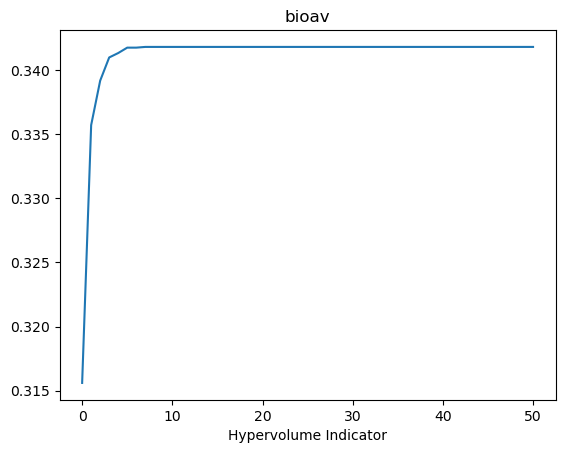

In [89]:
for dataset in datas:
    selected = data[(data['dataset'] == dataset)][['generation', 'hypervolume_indicator']].groupby('generation').median()

    plt.plot(selected.index, selected['hypervolume_indicator'])
    plt.xlabel('Generation')
    plt.xlabel('Hypervolume Indicator')
    plt.title(dataset)
    
    plt.show()


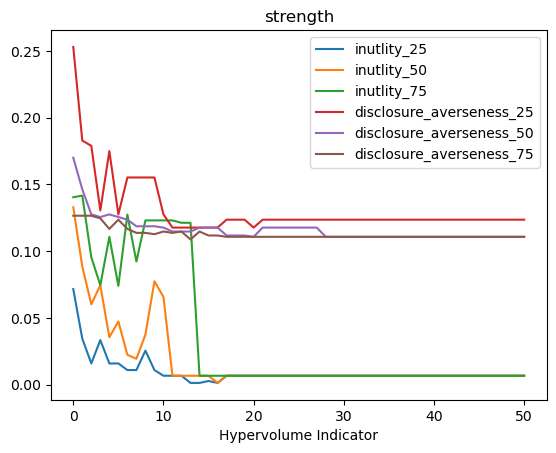

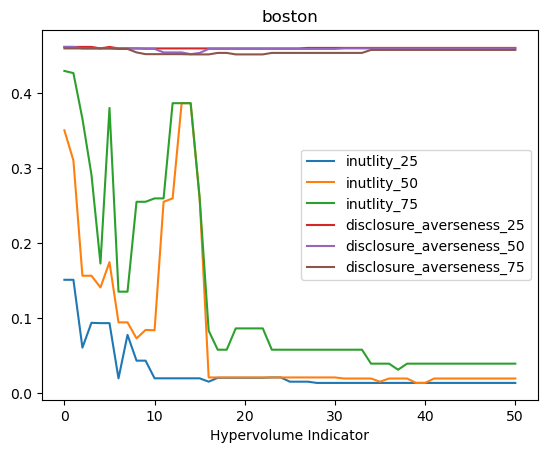

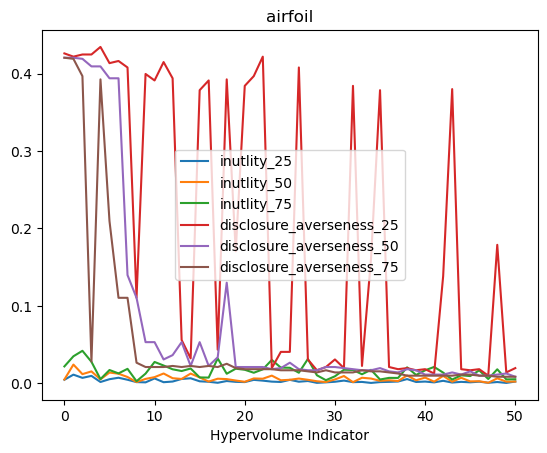

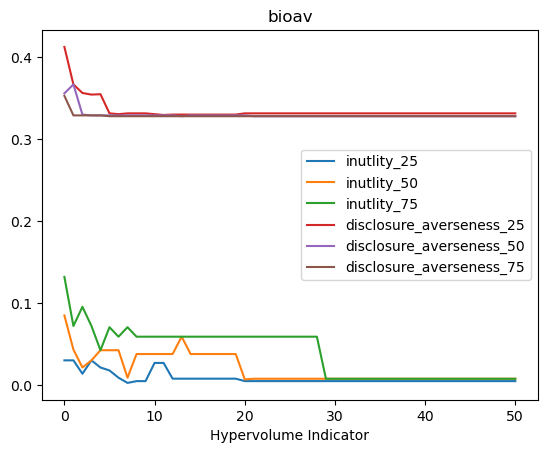

In [93]:
for dataset in datas:
    for metric in ['inutlity_25', 'inutlity_50', 'inutlity_75','disclosure_averseness_25', 'disclosure_averseness_50','disclosure_averseness_75']:
    
        selected = data[(data['dataset'] == dataset)][['generation',metric ]
                                                       ].groupby('generation').median()

        plt.plot(selected.index, selected[metric], label = metric)
    plt.xlabel('Generation')
    plt.ylabel('Hypervolume Indicator')
    plt.title(dataset)
    plt.legend()
    plt.show()


In [43]:
data

,inutility,disclosure_averseness,seed,generation,timing,dataset,hypervolume_indicator
0,"[0.02981491028849692, 0.13168497641393595, 0.0...","[0.3557213930348259, 0.3527363184079602, 0.498...",0,0,21.336940,bioav,0.289839
1,"[0.0054080269318586005, 0.007139650109421414]","[0.3666666666666667, 0.3288557213930348]",0,1,16.660803,bioav,0.341298
2,"[0.0054080269318586005, 0.007139650109421414, ...","[0.3666666666666667, 0.3288557213930348, 0.328...",0,2,16.220135,bioav,0.341298
3,"[0.0054080269318586005, 0.007139650109421414, ...","[0.3666666666666667, 0.3288557213930348, 0.328...",0,3,16.583133,bioav,0.341307
4,"[0.0054080269318586005, 0.10964102331804604, 0...","[0.3666666666666667, 0.32885572139303476, 0.36...",0,4,16.720485,bioav,0.341323
...,...,...,...,...,...,...,...
1015,[0.002599701776704766],[0.01536312849162011],4,46,84.982974,airfoil,0.968014
1016,"[0.009785997883940523, 0.0002513214744871428]","[0.01536312849162011, 0.4259776536312849]",4,47,89.831214,airfoil,0.965237
1017,"[0.04032645670987833, 0.00681920033811978, 0.0...","[0.01536312849162011, 0.018156424581005585, 0....",4,48,83.561092,airfoil,0.967530
1018,"[0.012749276670970255, 0.0003666173843173137, ...","[0.01536312849162011, 0.4259776536312849, 0.01...",4,49,88.868324,airfoil,0.967920


In [41]:
baselines = {'strength': [(0.0, 0.5), (0.14523599416584132, 0.1880597014925373)], 
             'boston': [(0.0, 0.5), (0.1647981898878993, 0.2776679841897233)], 
             'airfoil': [(0.0, 0.5), (0.5332659438825912, 0.4294743845642049)],
            'bioav': [(0.00037922208954266345, 0.49999999999999994), (0.026272228850265922, 0.35893854748603354)]}
datas = ['strength', 'boston', 'airfoil', 'bioav']
for i in range(4):
    data.loc[i*(51*5):(i+1)*(51*5), 'dataset'] = datas[i-1]

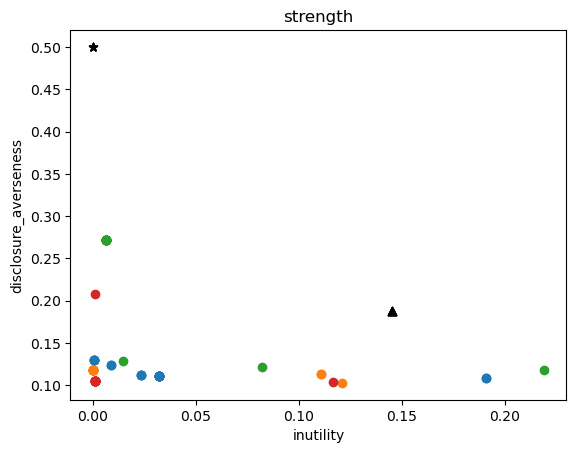

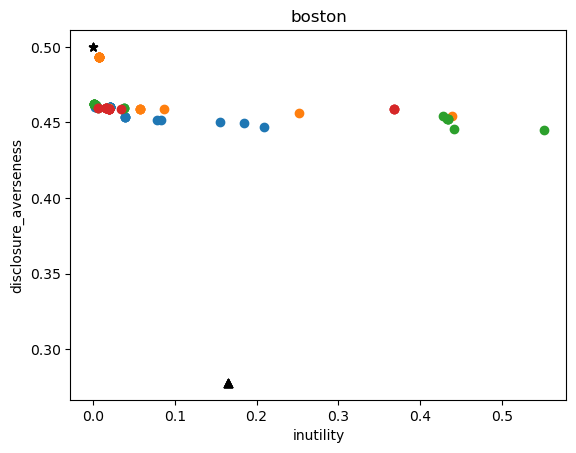

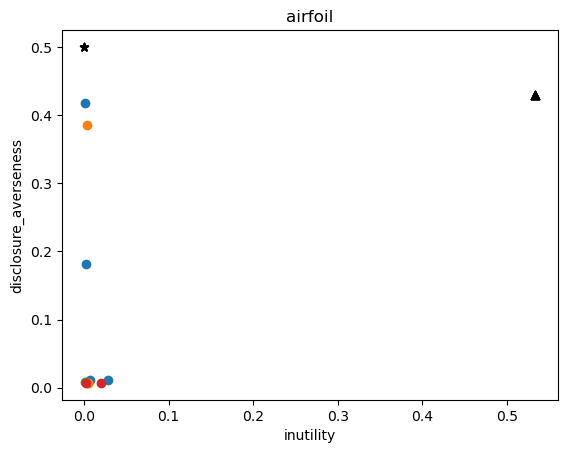

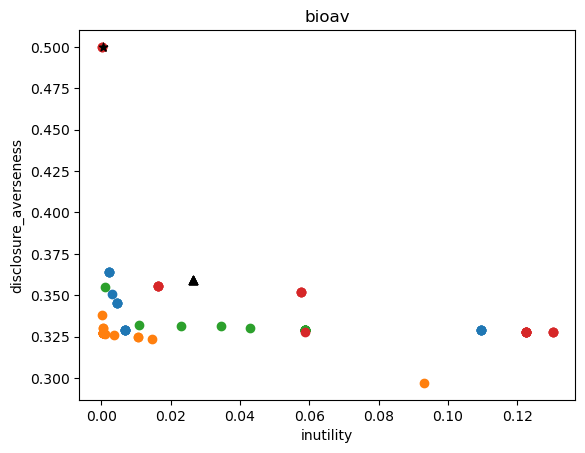

In [42]:
for dataset in datas:
    for seed in range(4):

        selected = data[(data['generation'] == 50) &
            (data['dataset'] == dataset) &
            (data['seed'] == seed)] 
        
        plt.scatter(eval(selected['inutility'].values[0]), eval(selected['disclosure_averseness'].values[0]))

        plt.scatter(baselines[dataset][0][0], baselines[dataset][0][1], marker = "*", color = 'black')
        plt.scatter(baselines[dataset][1][0], baselines[dataset][1][1], marker = "^", color = 'black')
        
    plt.xlabel('inutility')
    plt.ylabel('disclosure_averseness')
    plt.title(dataset)
    plt.show()